Add libraries

In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

Clone Cocoapi to Colab based on https://github.com/cocodataset/cocoapi

Compile CocoApi

In [ ]:
!git clone https://github.com/cocodataset/cocoapi coco
!pip install -U setuptools
!pip install -U wheel
!make install -C coco/PythonAPI

In [ ]:
!mkdir coco/images
# !mkdir coco/annotations/

In [2]:
import time
cuda = torch.cuda.is_available()
cuda

True

Download train dataset from COCO for 2017

In [47]:
%%bash
cd /content/coco/images
wget http://images.cocodataset.org/zips/train2017.zip
unzip -qq -o train2017.zip

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Download train dataset from COCO for 2014

In [ ]:
!cd coco/images
!wget http://images.cocodataset.org/zips/train2014.zip

Download Annotations and unzip it

In [ ]:
%%bash
rm -rf /content/coco/annotations
cd /content/coco/
wget -qq http://images.cocodataset.org/annotations/annotations_trainval2017.zip
unzip -qq annotations_trainval2017 

Understanding caption data in annotations

In [ ]:
import json
with open('/content/coco/annotations/captions_train2017.json') as f:
  data = json.load(f)
  # print(data)

# print(data)

In [ ]:
data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations'])

In [142]:
print(data.get('annotations')[0])
print(data.get('images')[0])

{'image_id': 203564, 'id': 37, 'caption': 'A bicycle replica with a clock as the front wheel.'}
{'license': 3, 'file_name': '000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}


In [38]:
for dict1 in data.get('annotations'):
  if dict1.get('image_id')==522418:
    print(dict1)

{'image_id': 522418, 'id': 681330, 'caption': 'A woman wearing a net on her head cutting a cake. '}
{'image_id': 522418, 'id': 686718, 'caption': 'A woman cutting a large white sheet cake.'}
{'image_id': 522418, 'id': 688839, 'caption': 'A woman wearing a hair net cutting a large sheet cake.'}
{'image_id': 522418, 'id': 693159, 'caption': 'there is a woman that is cutting a white cake'}
{'image_id': 522418, 'id': 693204, 'caption': "A woman marking a cake with the back of a chef's knife. "}


Understanding instances json file

In [33]:
with open('/content/coco/annotations/instances_train2017.json') as f:
  instances = json.load(f)

In [34]:
instances.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [35]:
print(instances.get('annotations')[1])
print(instances.get('images')[1])

{'segmentation': [[247.71, 354.7, 253.49, 346.99, 276.63, 337.35, 312.29, 333.49, 364.34, 331.57, 354.7, 327.71, 369.16, 325.78, 376.87, 333.49, 383.61, 330.6, 379.76, 321.93, 365.3, 320.0, 356.63, 317.11, 266.02, 331.57, 260.24, 334.46, 260.24, 337.35, 242.89, 338.31, 234.22, 338.31, 234.22, 348.92, 239.04, 353.73, 248.67, 355.66, 252.53, 353.73]], 'area': 1545.4213000000007, 'iscrowd': 0, 'image_id': 200365, 'bbox': [234.22, 317.11, 149.39, 38.55], 'category_id': 58, 'id': 509}
{'license': 4, 'file_name': '000000522418.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000522418.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-14 11:38:44', 'flickr_url': 'http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg', 'id': 522418}


In [37]:
for dict1 in instances.get('annotations'):
  if dict1.get('image_id')==522418:
    print(dict1)

{'segmentation': [[426.91, 58.24, 434.49, 77.74, 467.0, 80.99, 485.42, 86.41, 493.0, 129.75, 521.17, 128.67, 532.01, 144.92, 545.01, 164.42, 552.6, 170.93, 588.35, 178.51, 629.53, 165.51, 629.53, 177.43, 578.6, 214.27, 558.01, 241.35, 526.59, 329.12, 512.51, 370.29, 502.75, 415.8, 418.24, 409.3, 399.82, 414.72, 388.98, 420.14, 382.48, 424.47, 391.15, 430.97, 414.99, 425.55, 447.49, 427.72, 449.66, 435.3, 431.24, 438.56, 421.49, 452.64, 422.57, 456.98, 432.33, 464.56, 439.91, 458.06, 481.08, 465.64, 502.75, 464.56, 507.09, 473.23, 639.28, 474.31, 639.28, 1.9, 431.24, 0.0]], 'area': 63325.421899999994, 'iscrowd': 0, 'image_id': 522418, 'bbox': [382.48, 0.0, 256.8, 474.31], 'category_id': 1, 'id': 455475}
{'segmentation': [[416.41, 449.28, 253.36, 422.87, 234.06, 412.2, 277.23, 406.61, 343.77, 411.69, 379.84, 414.23, 384.41, 424.9, 397.11, 427.95, 410.31, 427.95, 445.36, 429.98, 454.0, 438.61, 431.65, 438.61, 423.01, 449.28]], 'area': 4200.516899999997, 'iscrowd': 0, 'image_id': 522418, '

In [4]:
import torchvision.datasets as dset
import torchvision.transforms as transforms

In [8]:
T=transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

# transforms.RandomResizedCrop(size=224, scale=(1.0, 1.0)),
#         transforms.RandomHorizontalFlip(),

T1=transforms.Compose([transforms.ToTensor()])

Run COCO Api

loading annotations into memory...
Done (t=0.96s)
creating index...
index created!
Number of samples:  118287
Image Size:  torch.Size([3, 478, 640])
['This wire metal rack holds several pairs of shoes and sandals', 'A dog sleeping on a show rack in the shoes.', 'Various slides and other footwear rest in a metal basket outdoors.', 'A small dog is curled up on top of the shoes', 'a shoe rack with some shoes and a dog sleeping on them']


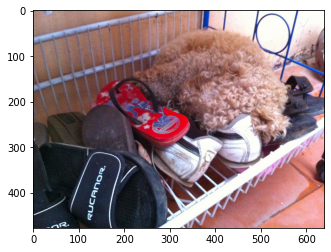

In [10]:

cap = dset.CocoCaptions(root = '/content/coco/images/train2017',
                        annFile = '/content/coco/annotations/captions_train2017.json',
                        transform=T1)

print('Number of samples: ', len(cap))
img, target = cap[5] # load 4th sample

print("Image Size: ", img.size())
print(target)
plt.imshow(img.permute(1, 2, 0))

In [11]:
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models
from skimage import io
import multiprocessing
import torch.nn as nn
import os
import numpy as np

In [66]:
cpu_count = multiprocessing.cpu_count()
print(cpu_count)

4


In [12]:
class ImagesDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, cap_api, root_dir):
        """
        Args:
            img_files (list): List of image file names
            root_dir (string): Folder where files are located 
        """
        self.cap_api = cap_api
        self.root_dir = root_dir
        
    def __len__(self):
        return len(self.cap_api)

    def __getitem__(self, idx):

        img, target = self.cap_api[idx]
        return img

In [13]:
root_dir = '/content/coco/images'

dataset = ImagesDataset(cap, root_dir)
dataloader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=4)

In [14]:
model=models.resnet101(pretrained=True)

In [15]:
device="cuda"

In [ ]:
# use pretrained maodel replacing last layer with identity to capture embeddings
for param in model.parameters():
    param.requires_grad = False
model.fc=nn.Identity()
model.to(device)

In [17]:
embeddings=[]
target_images=[]

with torch.no_grad():
  for step, (batch) in enumerate(dataloader):
      if step == 1000:
          break
      target_images.append(batch)
      batch=batch.to(device)
      rep = model(batch)[0].cpu().detach().numpy()
    
      embeddings.append(rep)

T-SNE

Install multicore TSNE

In [ ]:
!pip install MulticoreTSNE

Covert embeddings to array

In [18]:
X=np.array(embeddings)

Fit data into Tsne

In [45]:
from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_components=2,n_jobs=4,learning_rate=50,n_iter=2000)
Y = tsne.fit_transform(X)

In [46]:
# scale and move the coordinates so they fit [0; 1] range

def scale_to_01_range(x):
    # compute the distribution range
    value_range = (np.max(x) - np.min(x))
    # move the distribution so that it starts from zero
    # by extracting the minimal value from all its values
    starts_from_zero = x - np.min(x)
    # make the distribution fit [0; 1] by dividing by its range
    return starts_from_zero / value_range


Plot images in T-sne: code from:https://www.learnopencv.com/t-sne-for-feature-visualization/

In [47]:
vis_x = Y[:, 0]
vis_y = Y[:, 1]
tx = scale_to_01_range(vis_x)
ty = scale_to_01_range(vis_y)


Building the T-SNE plot: 100%|██████████| 1000/1000 [00:03<00:00, 322.98it/s]


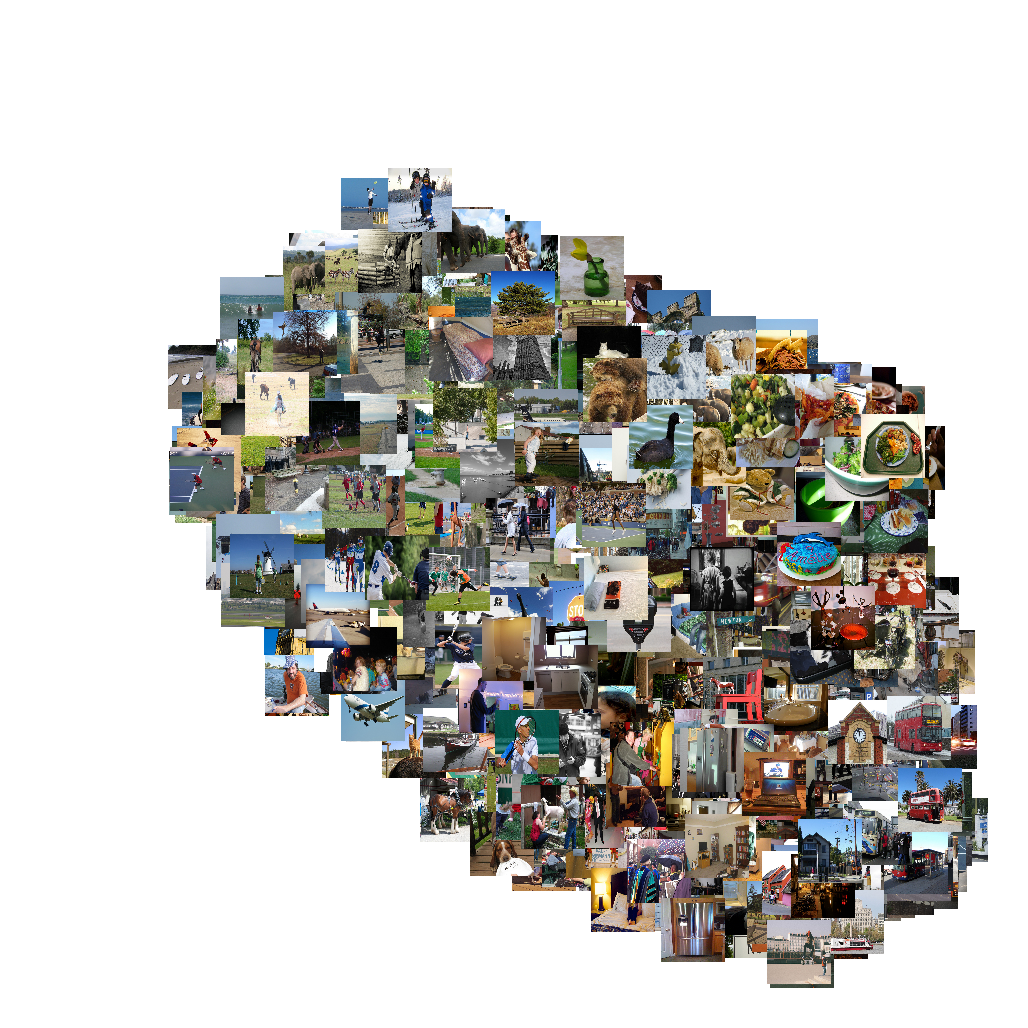

-1

In [55]:
from tqdm import tqdm
from google.colab.patches import cv2_imshow
import cv2
images=target_images
plot_size=1028
image_centers_area_size=756
offset=200
max_image_size=64
# Compute the coordinates of the image on the plot
def compute_plot_coordinates(image, x, y, image_centers_area_size, offset):
    image_height, image_width, _ = image.shape
    # compute the image center coordinates on the plot
    center_x = int(image_centers_area_size * x) + offset
    # in matplotlib, the y axis is directed upward
    # to have the same here, we need to mirror the y coordinate
    center_y = int(image_centers_area_size * (1 - y)) + offset
    # knowing the image center,
    # compute the coordinates of the top left and bottom right corner
    tl_x = center_x - int(image_width / 2)
    tl_y = center_y - int(image_height / 2)
    br_x = tl_x + image_width

    br_y = tl_y + image_height
    return tl_x, tl_y, br_x, br_y

# we'll put the image centers in the central area of the plot

# and use offsets to make sure the images fit the plot
# init the plot as white canvas
tsne_plot = 255 * np.ones((plot_size, plot_size, 3), np.uint8)

# now we'll put a small copy of every image to its corresponding T-SNE coordinate
for img,x, y in tqdm(zip(images,tx, ty),desc='Building the T-SNE plot',total=len(images)):
    
    img = img.squeeze(axis = 0).permute(1, 2, 0).numpy()
    img_cv=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    img_cv*=255
    # print('BGR IMAGE',np_image)
    # cv2_imshow(img_cv)
    # plt.imshow(image.numpy())
    
  
    # scale the image to put it to the plot
    # image = scale_image(image, max_image_size)
    img_cv = cv2.resize(img_cv,(64,64))
    # draw a rectangle with a color corresponding to the image class
    # image = draw_rectangle_by_class(image, label)

    # compute the coordinates of the image on the scaled plot visualization
    tl_x, tl_y, br_x, br_y = compute_plot_coordinates(img_cv, x, y, image_centers_area_size, offset)
    # print(tl_x, tl_y, br_x, br_y)
    # put the image to its t-SNE coordinates using numpy sub-array indices
    tsne_plot[tl_y:br_y, tl_x:br_x, :] = img_cv

cv2_imshow(tsne_plot)
cv2.waitKey()


Code for tsnecuda (not used as tsnecuda not working in colab)

In [ ]:
# download and unpack tsnecuda from anaconda.org
# https://anaconda.org/CannyLab/tsnecuda/2.1.0/download/linux-64/tsnecuda-2.1.0-cuda92.tar.bz2
!wget https://anaconda.org/CannyLab/tsnecuda/2.1.0/download/linux-64/tsnecuda-2.1.0-cuda101.tar.bz2
!tar xvjf tsnecuda-2.1.0-cuda101.tar.bz2
!cp -r site-packages/* /usr/local/lib/python3.6/dist-packages/

In [ ]:
# create a symbolic link between the downloaded libfaiss.so file and the location python's looking at

!echo $LD_LIBRARY_PATH 
# this is probably /usr/lib64-nvidia

!ln -s /content/lib/libfaiss.so $LD_LIBRARY_PATH/libfaiss.so

/usr/lib64-nvidia


In [ ]:
import tsnecuda
tsnecuda.test()

AttributeError: ignored